In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/voice.csv")
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df['label'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis=1)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=5)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.score(X_test, y_test)

0.9684542586750788

In [ ]:
predictions = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9684542586750788


In [ ]:
print(confusion_matrix(y_test, predictions))

[[293   4]
 [ 16 321]]


In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("dt")

'dt.pdf'

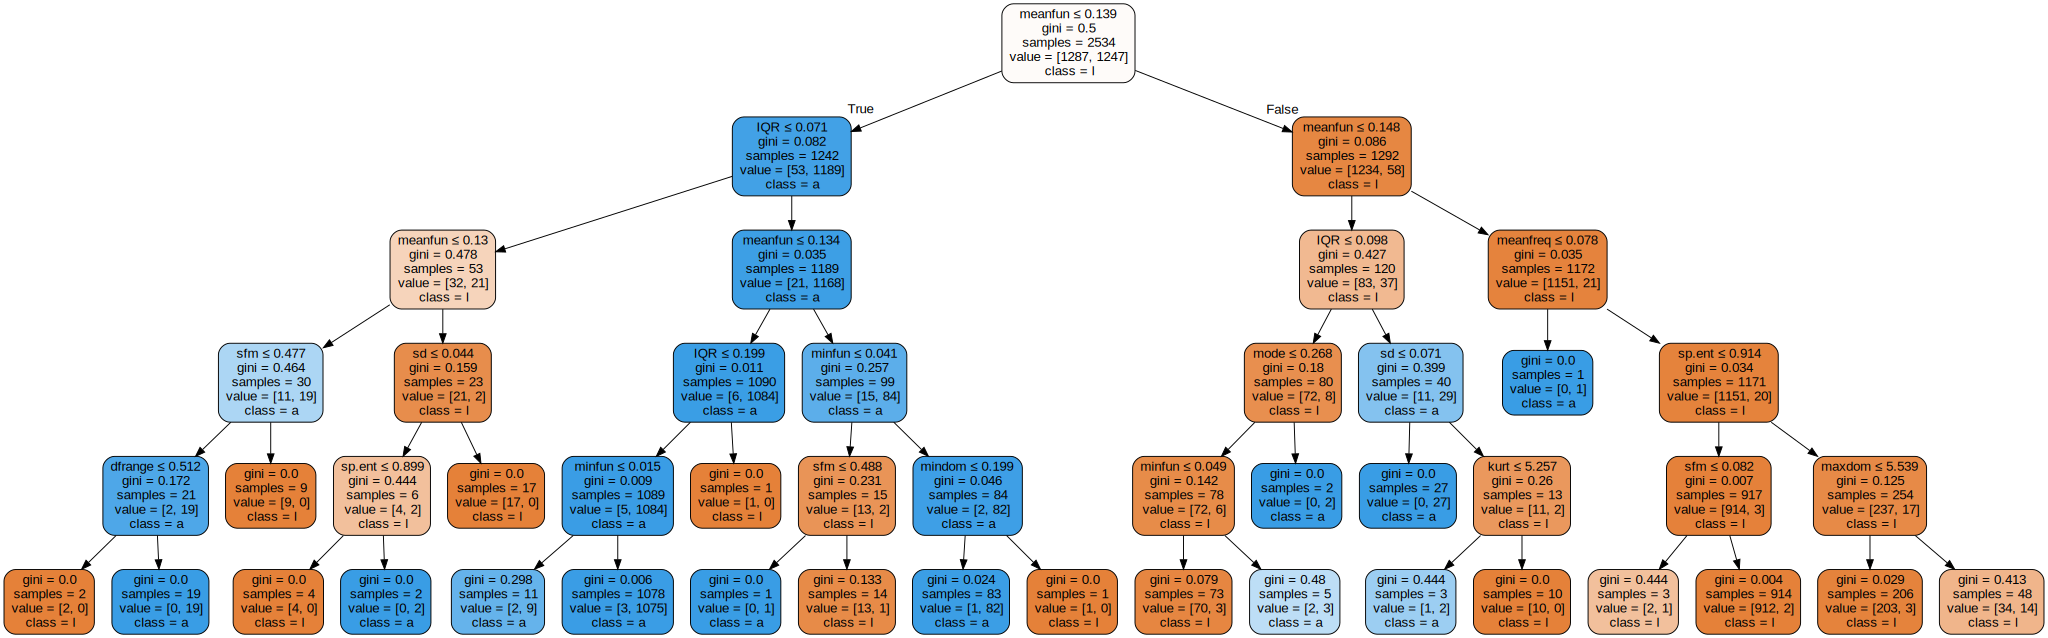

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None,
                     feature_names=X.columns,
                     class_names='label',
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph


**Implementing Random Search CV**

In [ ]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [5, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "criterion": ["gini", "entropy"]}

In [ ]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, None],
                                        'max_features': range(1, 11),
                                        'min_samples_split': range(2, 11)})

In [ ]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=9,
                       min_samples_split=3)

In [ ]:
random_search.best_params_

{'min_samples_split': 3,
 'max_features': 9,
 'max_depth': 5,
 'criterion': 'entropy'}

In [ ]:
random_search.best_score_

0.9684316798029172

In [ ]:
predictions = random_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9700315457413249


In [ ]:
print(confusion_matrix(y_test, predictions))

[[289   8]
 [ 11 326]]


**Implementing Grid Search CV**

In [ ]:
# use a full grid over all parameters
param_grid = {"max_depth": [4, None],
              "max_features": [10, 11, 12],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}

In [ ]:
grid_search = GridSearchCV(dt, param_grid= param_grid, cv=10)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, None], 'max_features': [10, 11, 12],
                         'min_samples_split': [2, 3, 10]})

In [ ]:
grid_search.best_score_

0.9703977467243472

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 12,
 'min_samples_split': 3}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_features=12, min_samples_split=3)

In [ ]:
predictions = grid_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

0.9700315457413249


In [ ]:
print(confusion_matrix(y_test,predictions))

[[293   4]
 [ 15 322]]
